In [51]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, u):
    return (u**2 + u) / t

def ue(t):
    return 2 * t / (1 - 2 * t)

In [52]:
# List of one-step methods: choose one to initialize LMMs

def fe(f, tspan, y0, h):
    t = np.arange(tspan[0], tspan[1] + h, h)
    N = len(t)
    y = np.zeros(N)
    y[0] = y0

    for i in range(N - 1):
        y[i+1] = y[i] + h * f(t[i], y[i])

    return t, y


def rk2(f, tspan, y0, h):
    t = np.arange(tspan[0], tspan[1] + h, h)
    N = len(t)
    y = np.zeros(N)
    y[0] = y0

    for i in range(N - 1):
        K1 = f(t[i], y[i])
        K2 = f(t[i] + 0.5 * h, y[i] + 0.5 * h * K1)
        y[i+1] = y[i] + h * K2

    return t, y


def rk3(f, tspan, y0, h):
    t = np.arange(tspan[0], tspan[1] + h, h)
    N = len(t)
    y = np.zeros(N)
    y[0] = y0

    for i in range(N - 1):
        K1 = f(t[i], y[i])
        K2 = f(t[i] + 0.5 * h, y[i] + 0.5 * h * K1)
        K3 = f(t[i] + h, y[i] - h * K1 + 2 * h * K2)
        y[i+1] = y[i] + (h / 6) * (K1 + 4 * K2 + K3)

    return t, y


def rk4(f, tspan, y0, h):
    t = np.arange(tspan[0], tspan[1] + h, h)
    N = len(t)
    y = np.zeros(N)
    y[0] = y0

    for i in range(N - 1):
        K1 = f(t[i], y[i])
        K2 = f(t[i] + 0.5 * h, y[i] + 0.5 * h * K1)
        K3 = f(t[i] + 0.5 * h, y[i] + 0.5 * h * K2)
        K4 = f(t[i] + h, y[i] + h * K3)
        y[i+1] = y[i] + h / 6 * (K1 + 2*K2 + 2*K3 + K4)

    return t, y

In [53]:
def AB2(f, tspan, y0, h, method):
    t = np.arange(tspan[0], tspan[1] + h, h)
    N = len(t)
    y = np.zeros(N)

    # choose a one-step method to initialize AB2
    _, aux = method(f, [t[0], t[1]], y0, h)
    y[:2] = aux[:2]

    for i in range(1, N - 1):
        y[i+1] = y[i] + h/2 * (-f(t[i-1], y[i-1]) + 3*f(t[i], y[i]))

    return t, y


In [54]:
def AB4(f, tspan, y0, h, method):
    t = np.arange(tspan[0], tspan[1] + h, h)
    N = len(t)
    y = np.zeros(N)

    # choose a one-step method to initialize AB$
    _, aux = method(f, [t[0], t[3]], y0, h)
    y[:4] = aux[:4]

    for i in range(3, N - 1):
        y[i+1] = y[i] + h/24 * (-9*f(t[i-3], y[i-3]) + 37*f(t[i-2], y[i-2]) - 59*f(t[i-1], y[i-1]) + 55*f(t[i], y[i]))

    return t, y

In [55]:
def compute_errors():
    t0, tf, u0 = 1, 5, -2
    dtvec = np.array([1/5, 1/10, 1/20, 1/40, 1/80, 1/160, 1/320, 1/640])
    err_AB2 = []
    err_AB4 = []

    for h in dtvec:
        t, yAB2 = AB2(f, [t0, tf], u0, h, fe) # initialize FE
        t, yAB4 = AB4(f, [t0, tf], u0, h, rk3)

        err_AB2.append(np.linalg.norm(ue(t) - yAB2, np.inf))
        err_AB4.append(np.linalg.norm(ue(t) - yAB4, np.inf))

    err_AB2 = np.array(err_AB2)
    err_AB4 = np.array(err_AB4)

    order_AB2 = np.insert(np.log2(err_AB2[:-1] / err_AB2[1:]), 0, np.nan)
    order_AB4 = np.insert(np.log2(err_AB4[:-1] / err_AB4[1:]), 0, np.nan)

    return dtvec, err_AB2, order_AB2, err_AB4, order_AB4


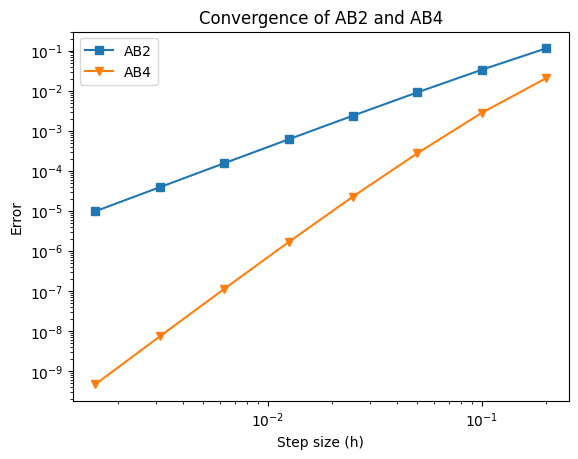

         dt  Error AB2  Order AB2
0  0.200000   0.114286        NaN
1  0.100000   0.033333   1.777608
2  0.050000   0.009091   1.874469
3  0.025000   0.002381   1.932886
4  0.012500   0.000610   1.965235
5  0.006250   0.000154   1.982298
6  0.003125   0.000039   1.991067
7  0.001563   0.000010   1.995513
         dt     Error AB4  Order AB4
0  0.200000  2.057121e-02        NaN
1  0.100000  2.805368e-03   2.874365
2  0.050000  2.740597e-04   3.355628
3  0.025000  2.265782e-05   3.596409
4  0.012500  1.652645e-06   3.777161
5  0.006250  1.119043e-07   3.884439
6  0.003125  7.286104e-09   3.940974
7  0.001563  4.648912e-10   3.970183


In [56]:
dtvec, err_AB2, order_AB2, err_AB4, order_AB4 = compute_errors()

plt.loglog(dtvec, err_AB2, 's-', label='AB2')
plt.loglog(dtvec, err_AB4, 'v-', label='AB4')
plt.legend()
plt.xlabel('Step size (h)')
plt.ylabel('Error')
plt.title('Convergence of AB2 and AB4')
plt.show()

import pandas as pd
T_AB2 = pd.DataFrame({'dt': dtvec, 'Error AB2': err_AB2, 'Order AB2': order_AB2})
T_AB4 = pd.DataFrame({'dt': dtvec, 'Error AB4': err_AB4, 'Order AB4': order_AB4})
print(T_AB2)
print(T_AB4)
